In [1]:
from A3a_rhl72 import *

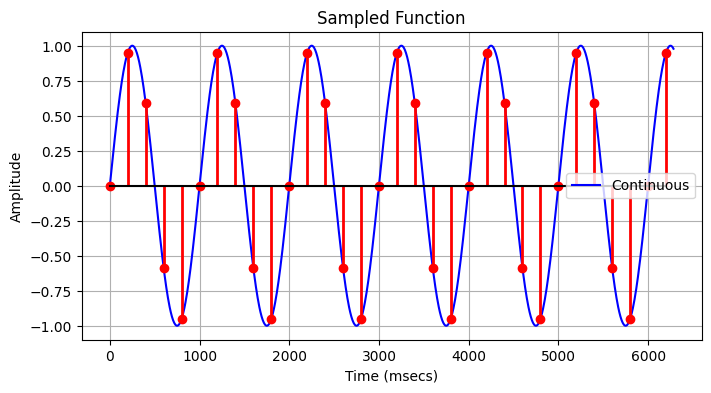

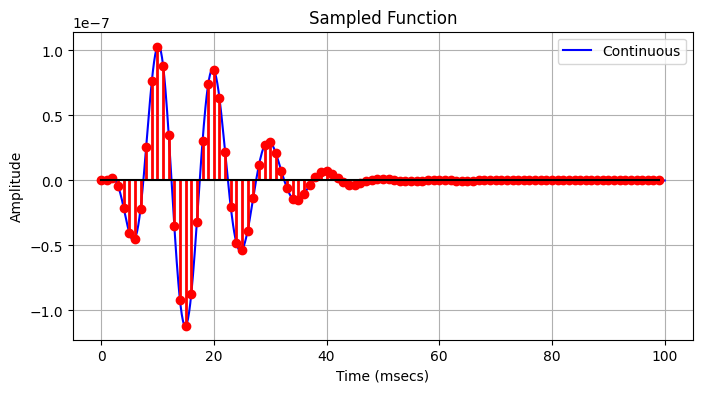

In [2]:
plot_sampled_function(sinewave, fs=5, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=1.0, d=0.0)


plot_sampled_function(gammatone, fs=1000, tlim=(0, 0.1), tscale=1e3, tunits="msecs", f=100, n=4, phi=0.0, a=1.0)

### Niquist Frequency
acts as a maximum before aliasing
$$
f_N = \frac{f_s}{2}
$$

### Aliasing
occurs when the frequency of the signal is greater than the Nyquist frequncy
$$
f > f_N
$$

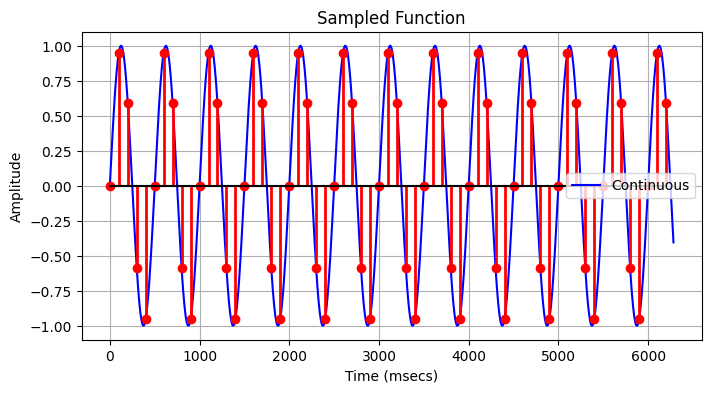

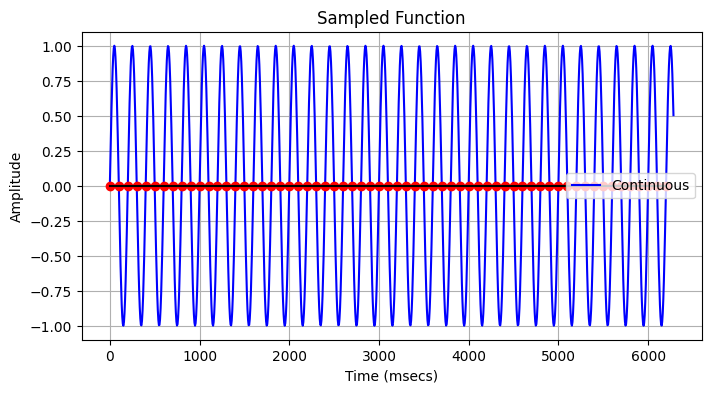

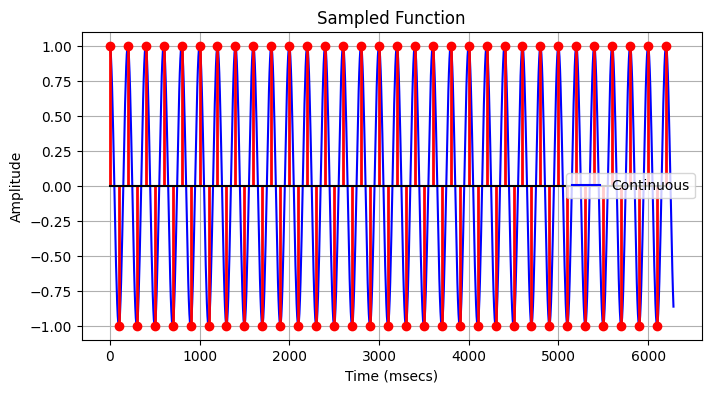

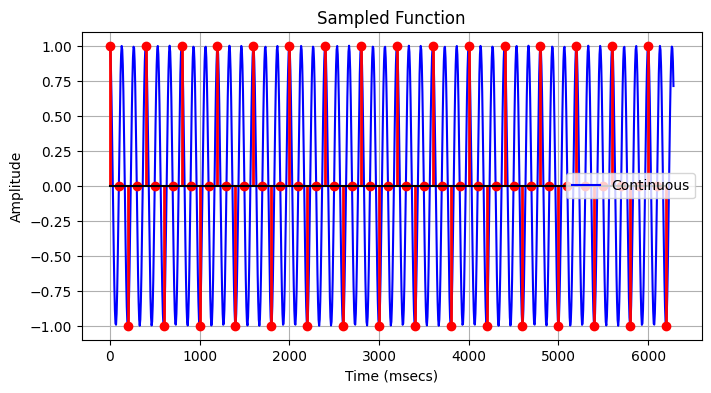

In [3]:
# Below Nyquist: fs = 10 Hz, f = 2 Hz (clearly sampled with only a few points per cycle)
plot_sampled_function(sinewave, fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=2)

# At Nyquist: fs = 10 Hz, f = 5 Hz
plot_sampled_function(sinewave, fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=5)

# Cosine at Nyquist: using cosine via phase shift
plot_sampled_function(lambda t, **kw: np.cos(2*np.pi*5*t), fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs")

# Above Nyquist: fs = 10 Hz, f = 7.5 Hz, which aliases
plot_sampled_function(lambda t, **kw: np.cos(2*np.pi*7.5*t), fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs")


# Dirac Delta Function
Used to model an impulse or discrete event as a brief impulse of energy.

$$
\delta(t)=\begin{cases}
\text{undefined} &  t = 0,\\[6pt]
\text{0} & t \neq 0.
\end{cases}
$$

but also,

$$
\int_{-\infty}^{\infty} \delta(t)dt = 1
$$

another way to interpret it is,
$$
\int_{-\infty}^{\infty} f(t) \delta(t-\tau)dt = f(\tau)
$$
- where $\delta(t-\tau)$ is zero everywhere except at $t=\tau$
- and at the infinitesimal point $f(\tau)$ is a constant and so so multiplies the integral, which is one.

# Unit Step Function
The step function is used to indicate a constant signal that starts at t=0.

$$
u(t)=\begin{cases}
\text{1} &  t \geq 0,\\[6pt]
\text{0} & t < 0.
\end{cases}
$$

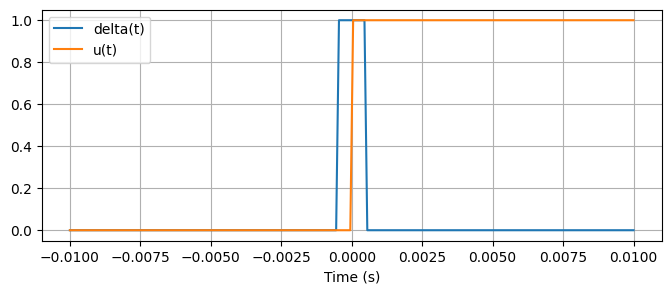

In [4]:
# Example plots:
t = np.linspace(-0.01, 0.01, 200)
plt.figure(figsize=(8,3))
plt.plot(t, delta(t, fs=1000), label="delta(t)")
plt.plot(t, u(t), label="u(t)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()

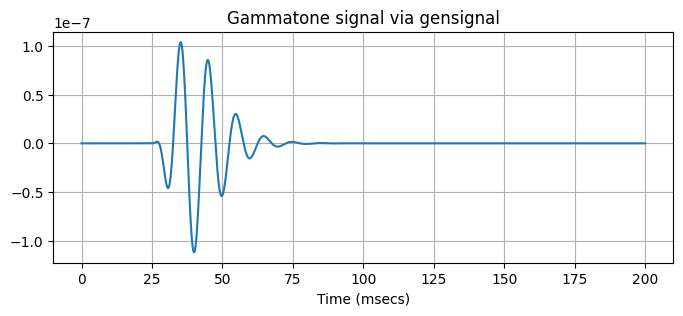

In [5]:
# Example usage: a gammatone signal delayed by 0.025 s and lasting 0.1 s
t = np.linspace(0, 0.2, 1000)
x = gensignal(t, gammatone, tau=0.025, T=0.1, f=100, n=4, phi=0.0, a=1.0)
plt.figure(figsize=(8,3))
plt.plot(t*1e3, x)
plt.xlabel("Time (msecs)")
plt.title("Gammatone signal via gensignal")
plt.grid(True)
plt.show()

# Power

the average energy over a period.

$$
E_x = \sum_{n=1}^{N} |x[n]|^2
$$

power of x is then,
$$
P_x = \frac{1}{N}\sum_{n=1}^{N} |x[n]|^2 = \sigma_x^2
$$

for a signal with additive noise
$$
y[t] = x[t] + \epsilon[t]
$$

the SNR is simply
$$
\frac{P_x}{P_\epsilon}
$$

However, it is usually described in decibals

$$
dB \space SNR = 10 log_{10}(\frac{P_x}{P_\epsilon})
=20 log_{10}(\frac{\sigma_x}{\sigma_{\epsilon}})
$$


# Peak Signal Noise Ratio
Is used more often in image processing.

$$
 PSNR = 10 log_{10}(\frac{max_t(y[t])^2}{\sigma_y^2})
 = 20 log_{10}(\frac{max_t(y[t])}{\sigma_y})
$$


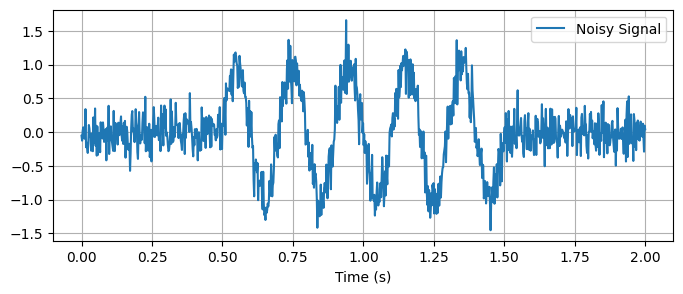

In [6]:
# Example: Noisy sinewave signal.
t = np.linspace(0, 2, 1000)
y = noisysignal(t, sinewave, tau=0.5, T=1, sigma=0.2, f=5, d=0.0)
plt.figure(figsize=(8,3))
plt.plot(t, y, label="Noisy Signal")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Example:
# Suppose x is our signal generated over a time vector.
t = np.linspace(0, 2, 1000)
x = gensignal(t, sinewave, tau=0.5, T=1, f=5, d=0.0)
desired_dBsnr = 10
sigma_required = snr2sigma(x, dBsnr=desired_dBsnr)
print("Noise sigma for", desired_dBsnr, "dB SNR:", sigma_required)


Noise sigma for 10 dB SNR: 0.15803476716592346


In [8]:
# Demonstration:
y_test = noisysignal(t, sinewave, tau=0.5, T=1, sigma=0.2, f=5, d=0.0)
ind = extent(y_test, theta=0.05)
print("Estimated signal extent:", ind)

# One could then compute the SNR using the signal’s energy over that extent
if ind is not None:
    sig_range = slice(ind[0], ind[1]+1)
    Ps = power(x[sig_range])
    Pn = power(y_test[sig_range] - x[sig_range])
    print("Estimated SNR (dB):", snr(Ps, Pn))

Estimated signal extent: (1, 998)
Estimated SNR (dB): 8.17074520867055


In [9]:
import numpy as np
from scipy.io.wavfile import write

# Synthesize a 5-second waveform with 20 random gammatones.
t, waveform = grand_synthesis(duration=5, fs=44100, num_tones=20, T=0.1, fmin=200, fmax=2000)

# Save to a .wav file.
write("synthesized.wav", 44100, (waveform * 32767).astype(np.int16))
print("Synthesized audio saved as synthesized.wav")


Synthesized audio saved as synthesized.wav


# Check

q1

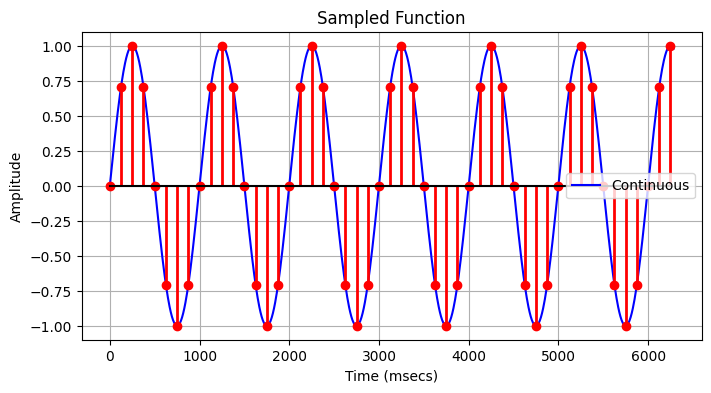

In [10]:
plot_sampled_function(sinewave, fs=8, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=1.0, d=0.0)


q2

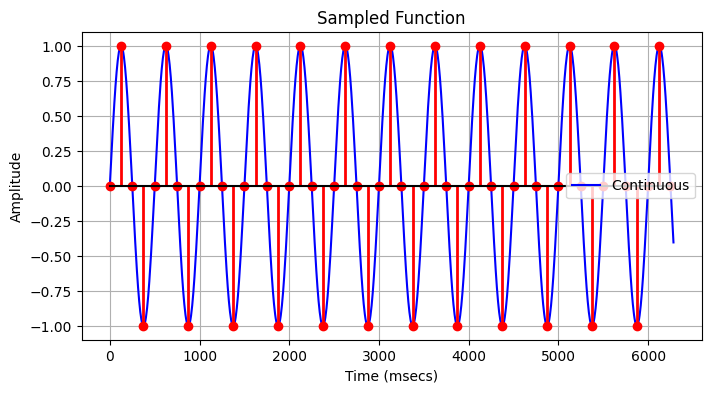

In [11]:
plot_sampled_function(sinewave, fs=8, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=2.0, d=0.0)


q3

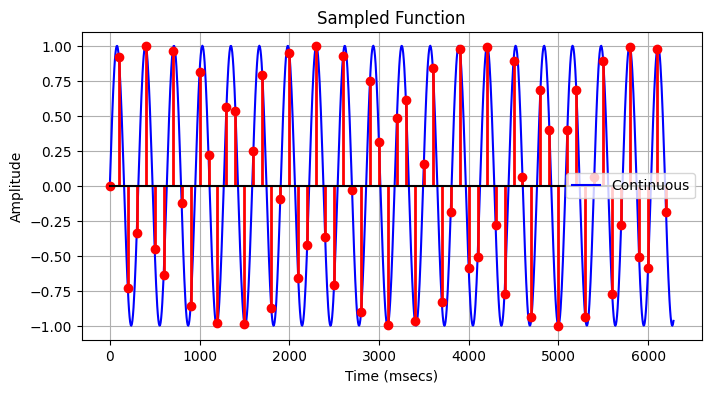

In [12]:
plot_sampled_function(sinewave, fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=3.15, d=0.0)


q4

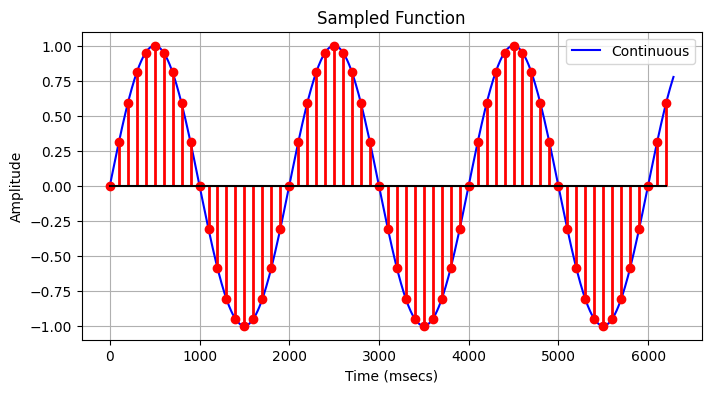

In [13]:
plot_sampled_function(sinewave, fs=10, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=.5, d=0.0)


q5

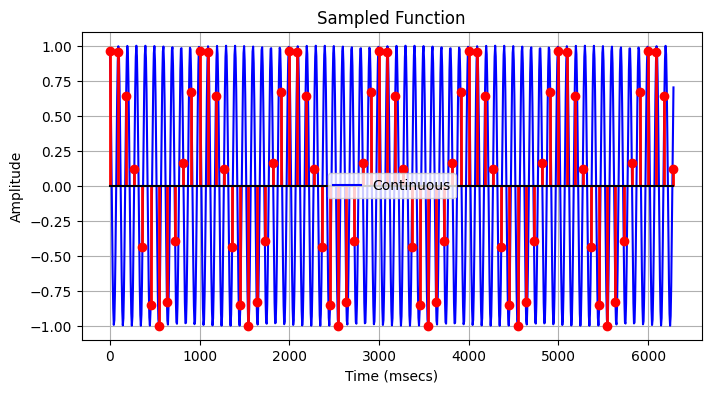

In [14]:
plot_sampled_function(sinewave, fs=11, tlim=(0, 2*np.pi), tscale=1e3, tunits="msecs", f=10, d=np.pi/2)


Aliasing of a 1100 Hz Cosine Wave Sampled at 1000 Hz

Step 1: Nyquist Folding Frequency
The Nyquist frequency is given by:

$$
f_s / 2 = 1000 / 2 = 500 \text{ Hz}
$$

Any frequency component above this will alias back into the range \([0, 500]\) Hz.

Step 2: Compute the Aliased Frequency
The aliased frequency \( f_a \) is given by:

$$
f_a = | f - k f_s |
$$

where \( k \) is an integer chosen such that \( f_a \) falls within the range \([0, 500]\).

For \( f = 1100 \) Hz and \( f_s = 1000 \) Hz:

$$
f_a = |1100 - 1(1000)|
$$

$$
f_a = |1100 - 1000| = 100 \text{ Hz}
$$

Conclusion

The apparent frequency of the 1100 Hz cosine wave when sampled at 1000 Hz is **100 Hz** due to aliasing.



q6

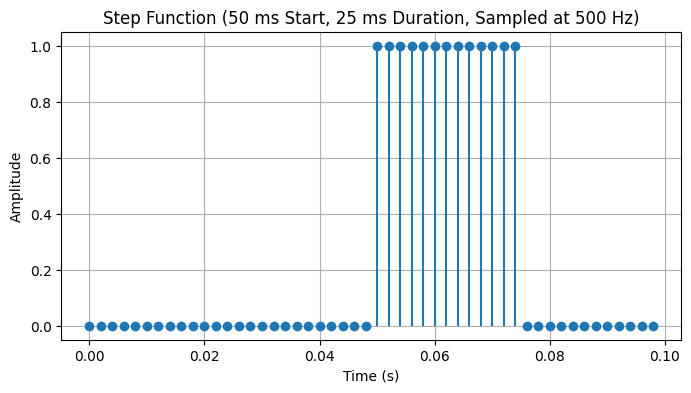

In [17]:
# Given sampling frequency
fs = 500  # Hz
dt = 1 / fs  # Time step
t = np.arange(0, 0.1, dt)  # Time vector from 0 to 100 ms

# Step function parameters
start_time = 0.050  # 50 ms
duration = 0.025  # 25 ms
end_time = start_time + duration

# Define the step function
step_function = np.where((t >= start_time) & (t < end_time), 1.0, 0.0)

# Plot
plt.figure(figsize=(8, 4))
plt.stem(t, step_function, basefmt=" ")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Step Function (50 ms Start, 25 ms Duration, Sampled at 500 Hz)")
plt.grid(True)
plt.show()



q7

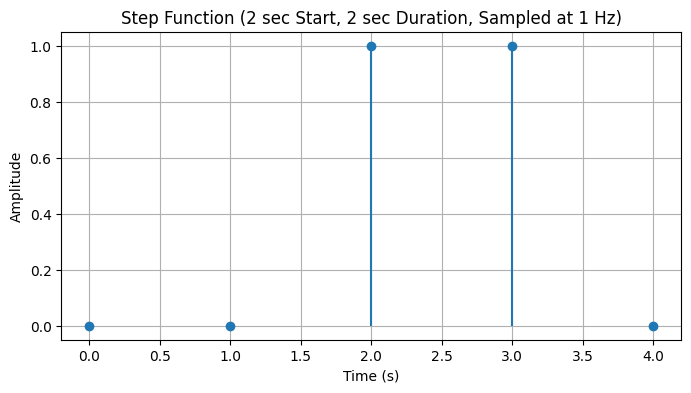

In [18]:
# Given sampling frequency
fs = 1  # Hz
dt = 1 / fs  # Time step
t = np.arange(0, 5, dt)  # Time vector from 0 to 5 seconds

# Step function parameters
start_time = 2  # Step starts at 2 sec
duration = 2  # Step duration is 2 sec
end_time = start_time + duration

# Define the step function
step_function = np.where((t >= start_time) & (t < end_time), 1.0, 0.0)

# Plot
plt.figure(figsize=(8, 4))
plt.stem(t, step_function, basefmt=" ")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Step Function (2 sec Start, 2 sec Duration, Sampled at 1 Hz)")
plt.grid(True)
plt.show()


q8

In [20]:
import numpy as np

# 1) Sampling parameters
fs = 100             # Sampling frequency (Hz)
duration = 1.0       # Signal duration (seconds)
t = np.arange(0, duration, 1/fs)

# 2) Generate a 1 Hz sine wave from t=0 to t=1s using your gensignal() and sinewave().
#    gensignal(t, g, tau, T, ...) will call the function g(...) in the interval [tau, tau+T).
#    Here, g is sinewave, tau=0, T=1 second, f=1.0 Hz.
sig = gensignal(t, sinewave, tau=0, T=1, f=1.0, d=0.0)

# 3) Compute the energy using your energy() function.
E = energy(sig)

# 4) Round to three decimal places as requested.
E_rounded = round(E, 3)

print("Energy of 1 Hz sine wave over 1s (sampled at 100 Hz):", E_rounded)


Energy of 1 Hz sine wave over 1s (sampled at 100 Hz): 50.0


q9

In [21]:
# Sampling parameters
fs = 100             # Sampling frequency (Hz)
duration = 1.0       # Duration in seconds
t = np.arange(0, duration, 1/fs)

# Generate the 1 Hz sine wave over the interval [0, 1)
# Using gensignal to window the sinewave function from t=0 to t=1 sec.
signal = gensignal(t, sinewave, tau=0, T=duration, f=1.0, d=0.0)

# Compute the power using your power() function
P = power(signal)

# Round the power to three decimal places
P_rounded = round(P, 3)

print("Power of the 1 Hz sine wave:", P_rounded)


Power of the 1 Hz sine wave: 0.5


q10

In [22]:
# Given parameters
fs = 1000  # Sampling frequency in Hz
f_gammatone = 100  # Gammatone center frequency in Hz
t_start = 5e-3  # 5 ms in seconds
t_end = 40e-3  # 40 ms in seconds

# Generate time vector within the range [5ms, 40ms]
t = np.arange(t_start, t_end + 1/fs, 1/fs)  # Inclusive of 40ms

# Generate the normalized gammatone filter output
gammatone_signal = gammatone(t, f=f_gammatone, n=4, phi=0.0, a=1.0)

# Normalize the gammatone using gammatone_norm function
norm_factor = gammatone_norm(f_gammatone, n=4, fs=fs)
gammatone_signal /= norm_factor

# Compute the power using power() function
P_gammatone = power(gammatone_signal)

# Round to three decimal places
P_gammatone_rounded = round(P_gammatone, 3)

P_gammatone_rounded


0.003

q11

In [23]:
# Given signal power and noise power
signal_power = 20
noise_power = 1

# Compute SNR in dB
snr_dB = 10 * np.log10(signal_power / noise_power)

# Round to three decimal places
snr_dB_rounded = round(snr_dB, 3)

snr_dB_rounded


13.01

q12

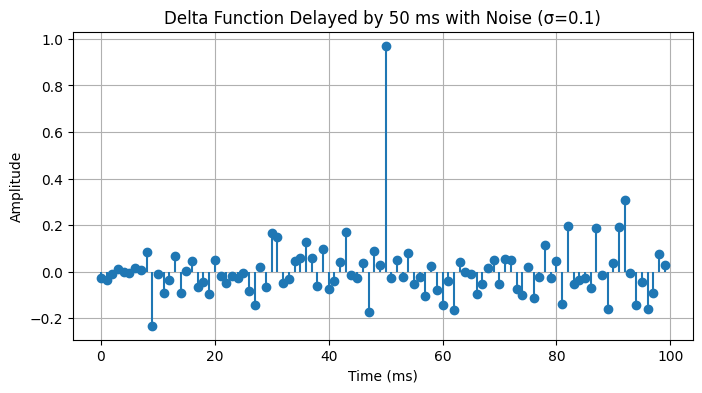

In [24]:
import matplotlib.pyplot as plt

# Given parameters
fs = 1000  # Sampling frequency in Hz
duration = 0.1  # Duration in seconds (100 ms)
t = np.arange(0, duration, 1/fs)  # Time vector
delay = 0.050  # 50 ms delay in seconds
noise_std = 0.1  # Standard deviation of Gaussian noise

# Generate delta function (impulse)
delta_signal = np.zeros_like(t)
delta_signal[np.argmin(np.abs(t - delay))] = 1.0  # Place impulse at 50 ms

# Generate Gaussian noise
noise = np.random.normal(0, noise_std, size=t.shape)

# Noisy delta signal
noisy_signal = delta_signal + noise

# Plot
plt.figure(figsize=(8, 4))
plt.stem(t * 1000, noisy_signal, basefmt=" ")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Delta Function Delayed by 50 ms with Noise (σ=0.1)")
plt.grid(True)
plt.show()


q13

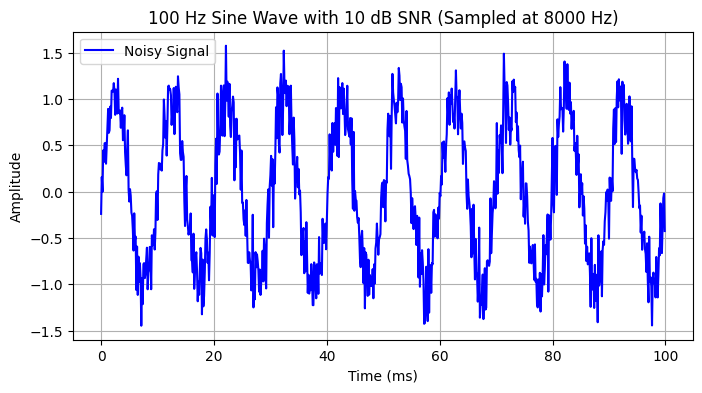

In [25]:
import matplotlib.pyplot as plt

# Given parameters
fs = 8000  # Sampling frequency in Hz
duration = 0.1  # Duration in seconds (100 ms)
f_sine = 100  # Sine wave frequency in Hz
snr_dB = 10  # Signal-to-noise ratio in dB

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate clean sine wave
sine_wave = np.sin(2 * np.pi * f_sine * t)

# Compute noise standard deviation for given SNR
signal_power = np.mean(sine_wave**2)
noise_power = signal_power / (10**(snr_dB / 10))
noise_std = np.sqrt(noise_power)

# Generate Gaussian noise
noise = np.random.normal(0, noise_std, size=t.shape)

# Add noise to sine wave
noisy_signal = sine_wave + noise

# Plot the waveform
plt.figure(figsize=(8, 4))
plt.plot(t * 1000, noisy_signal, label="Noisy Signal", color="blue")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("100 Hz Sine Wave with 10 dB SNR (Sampled at 8000 Hz)")
plt.grid(True)
plt.legend()
plt.show()


q14

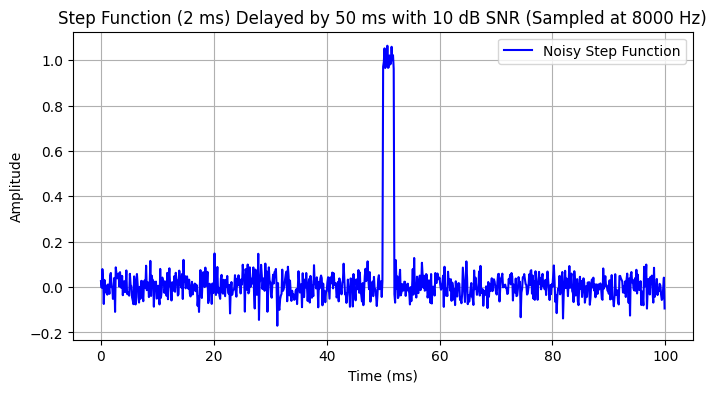

In [26]:
# Given parameters
fs = 8000  # Sampling frequency in Hz
duration = 0.1  # Total waveform duration (100 ms)
step_duration = 2e-3  # Step function duration (2 ms)
delay = 50e-3  # Step function delay (50 ms)
snr_dB = 10  # Desired SNR in dB

# Time vector
t = np.arange(0, duration, 1/fs)

# Generate step function
step_signal = np.where((t >= delay) & (t < delay + step_duration), 1.0, 0.0)

# Compute noise standard deviation based on SNR and step signal power
signal_power = np.mean(step_signal**2)
noise_power = signal_power / (10**(snr_dB / 10))
noise_std = np.sqrt(noise_power)

# Generate Gaussian noise
noise = np.random.normal(0, noise_std, size=t.shape)

# Add noise to step function
noisy_signal = step_signal + noise

# Plot the waveform
plt.figure(figsize=(8, 4))
plt.plot(t * 1000, noisy_signal, label="Noisy Step Function", color="blue")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("Step Function (2 ms) Delayed by 50 ms with 10 dB SNR (Sampled at 8000 Hz)")
plt.grid(True)
plt.legend()
plt.show()



q9